# グリッドサーチ

全てのハイパーパラメータの組み合わせについて性能を評価する。

### データを訓練＋検証セット、テストセットに3分割する

In [1]:
from sklearn.svm import SVC 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

# データを訓練とテストに分割
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

# データを訓練と検証に分割
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)

print("Size of training set: {} Size of validation set: {} Size of test set: {}".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
  for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    svm = SVC(gamma=gamma, C=C)
    svm.fit(X_train, y_train)
    score = svm.score(X_valid, y_valid)
    if score > best_score:
      best_score = score
      best_params = {'C': C, 'gamma': gamma}
      
# 訓練セットと検証セットを用いてモデルを再構築し
# テストセットで評価する
svm = SVC(**best_params)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_params))
print("Test set score with best parameters: {:.2f}".format(test_score))



Size of training set: 84 Size of validation set: 28 Size of test set: 38
Best score on validation set: 0.96
Best parameters: {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


### 交差検証を適用してさらに精度を高める

In [2]:

from sklearn.svm import SVC 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

iris = load_iris()

# データを訓練とテストに分割
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

# データを訓練と検証に分割
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)

print("Size of training set: {} Size of validation set: {} Size of test set: {}".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
  for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    svm = SVC(gamma=gamma, C=C)
    svm.fit(X_train, y_train)
    scores = cross_val_score(svm, X_valid, y_valid, cv=5)
    score = scores.mean()
    if score > best_score:
      best_score = score
      best_params = {'C': C, 'gamma': gamma}
      
# 訓練セットと検証セットを用いてモデルを再構築し
# テストセットで評価する
svm = SVC(**best_params)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_params))
print("Test set score with best parameters: {:.2f}".format(test_score))



Size of training set: 84 Size of validation set: 28 Size of test set: 38
Best score on validation set: 0.93
Best parameters: {'C': 100, 'gamma': 0.001}
Test set score with best parameters: 0.97


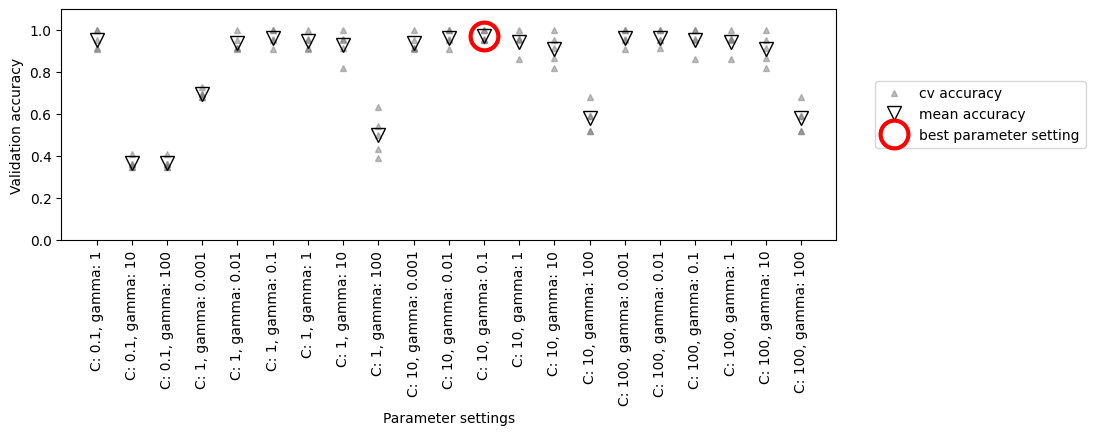

In [3]:
import mglearn
mglearn.plots.plot_cross_val_selection()

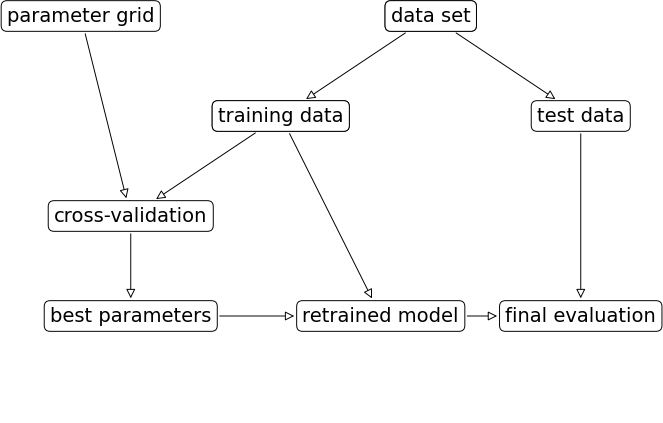

In [5]:
mglearn.plots.plot_grid_search_overview()